In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
df=pd.read_excel('数据表格\Bank_Personal_Loan_Modelling.xlsx','Data')  

In [6]:
df.head() #查看数据

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 数据解释
1. ID: 序列号
2. Age: 用户年龄
3. Experience: 工作经验
4. Income: 年收入（千美元）
5. ZIP Code: 邮政编号
6. Family: 家庭人口数量
7. CCAvg: 没有信用卡平均还款
8. Education: 教育水平，1：未毕业，2.本科毕业，3.更高学历
9. Mortgage: 是否有房屋抵押
10. Personal Loan: 在上次的银行营销活动中是否贷款
11. Securities Account: 是否有证券账户
12. CD Account: 是否有银行存款账户
13. Online: 是否使用网银
14. Credit card: 是否使用信用卡


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# 
1.发现工作经验最小值为负数，异常值
2.每月信用卡平均消费，收入，房屋抵押金额远超平均值，稍后查看异常值

In [8]:
df.isnull().sum()  #发现没有null值

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP_Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

数据有连续和离散型，将数据按照类型分开

In [10]:
continuous_df=[i for i in df.columns if df[i].nunique()>5]

In [11]:
continuous_df

['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'CCAvg', 'Mortgage']

In [12]:
categorical_df=[i for i in df.columns if df[i].nunique()<=5]

In [13]:
categorical_df

['Family',
 'Education',
 'Personal_Loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

#连续型中id没有意义，离散型中是否有贷款是目标变量，所以先去掉这两个变量

In [14]:
continuous_df.remove('ID')   

In [15]:
categorical_df.remove('Personal_Loan')

In [24]:
from warnings import simplefilter      #忽略报错
simplefilter(action='ignore', category=FutureWarning)

通过图形查看各个变量情况

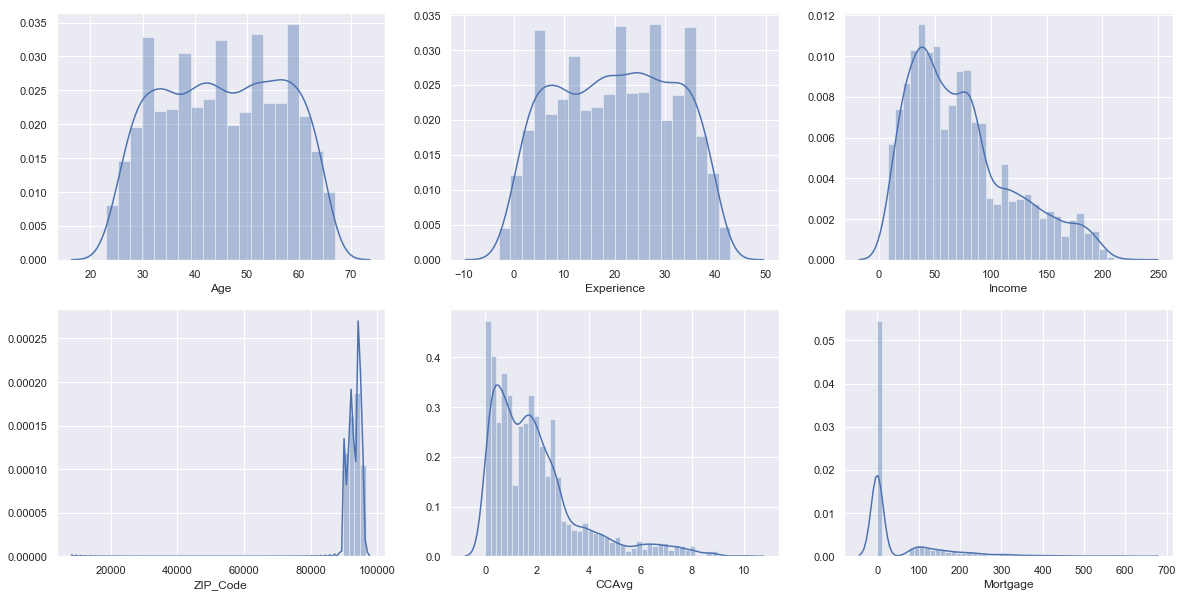

In [17]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_df):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df[col])

1.年龄和工作经验分部想多均匀
2.收入，每月信用卡平均消费，房屋抵押金额，都左偏
3.邮政编码右偏，且集中在某些值上，可能集中在某些地区

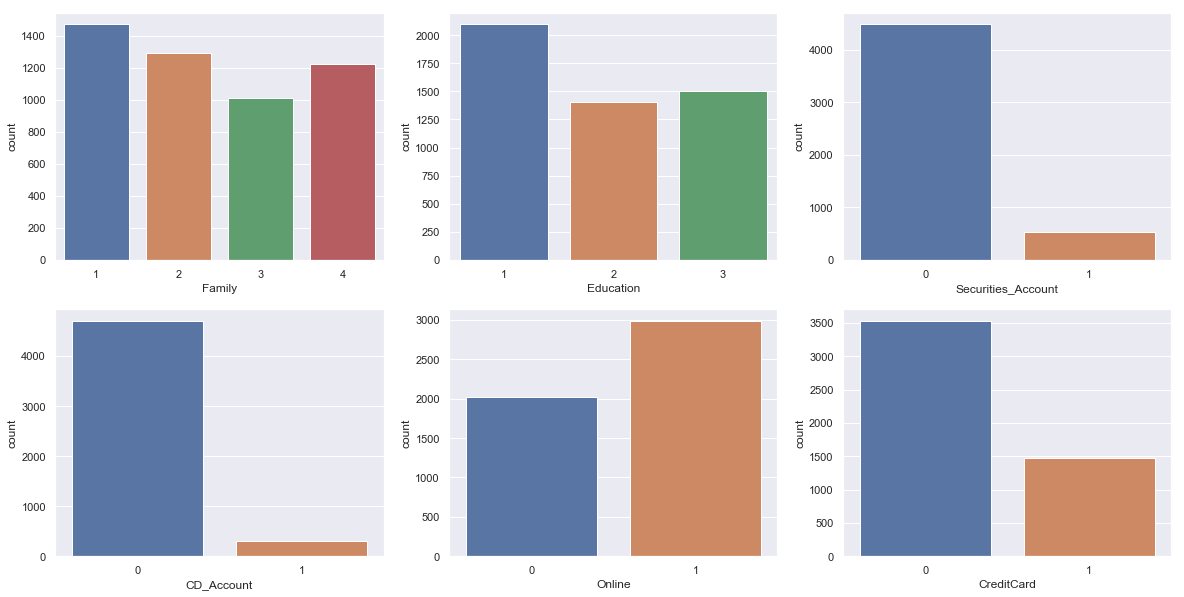

In [18]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_df):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(df[col])

1.大多数人没有证券账户和存款账户
2.大多数人用网银方便
3.家庭人口大多是一个人

# 查询其他变量与目标变量（是否有贷款）关系 

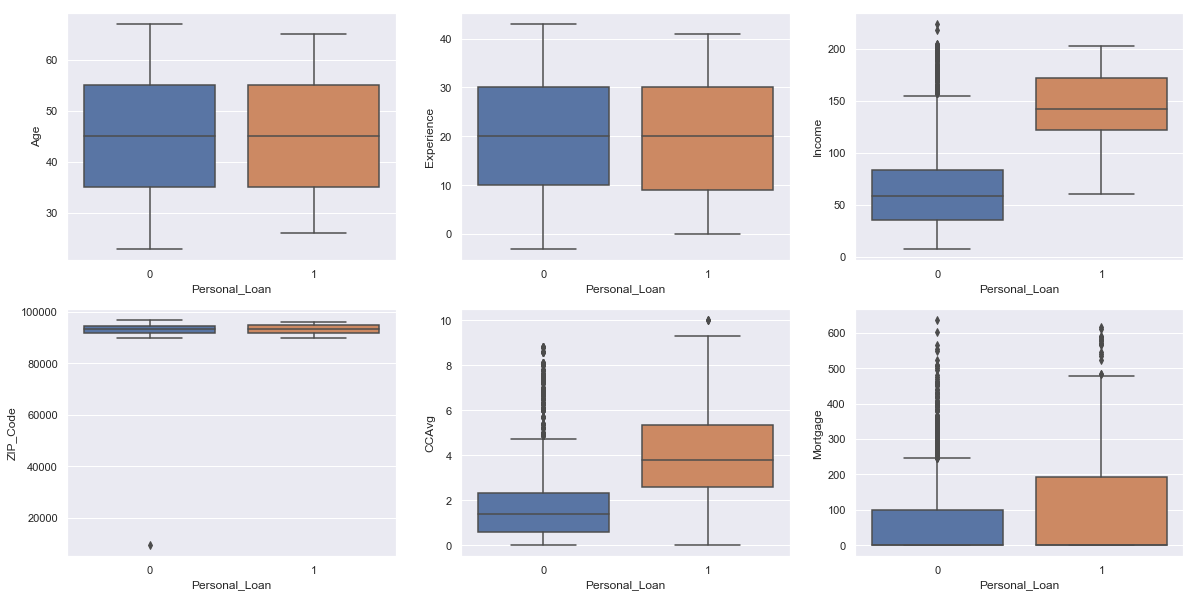

In [19]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_df):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(x=df['Personal_Loan'],y=df[col])

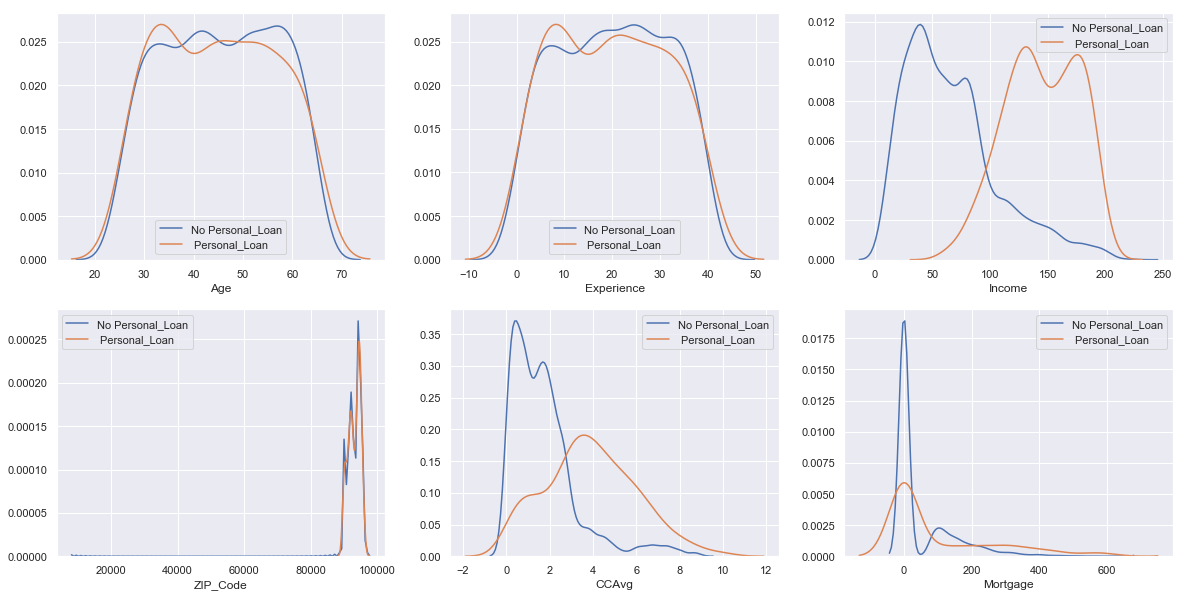

In [40]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_df):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df[col][df['Personal_Loan']==0],hist=False,label='No Personal_Loan')
    sns.distplot(df[col][df['Personal_Loan']==1],hist=False,label=' Personal_Loan')                  

1.年龄和工作经验对贷款的影响不是很大
2.收入和每月信用卡平均消费对贷款影响较大，.收入和每月信用卡平均消费越高，越有可能贷款
3.房屋抵押金额越高，越有可能贷款

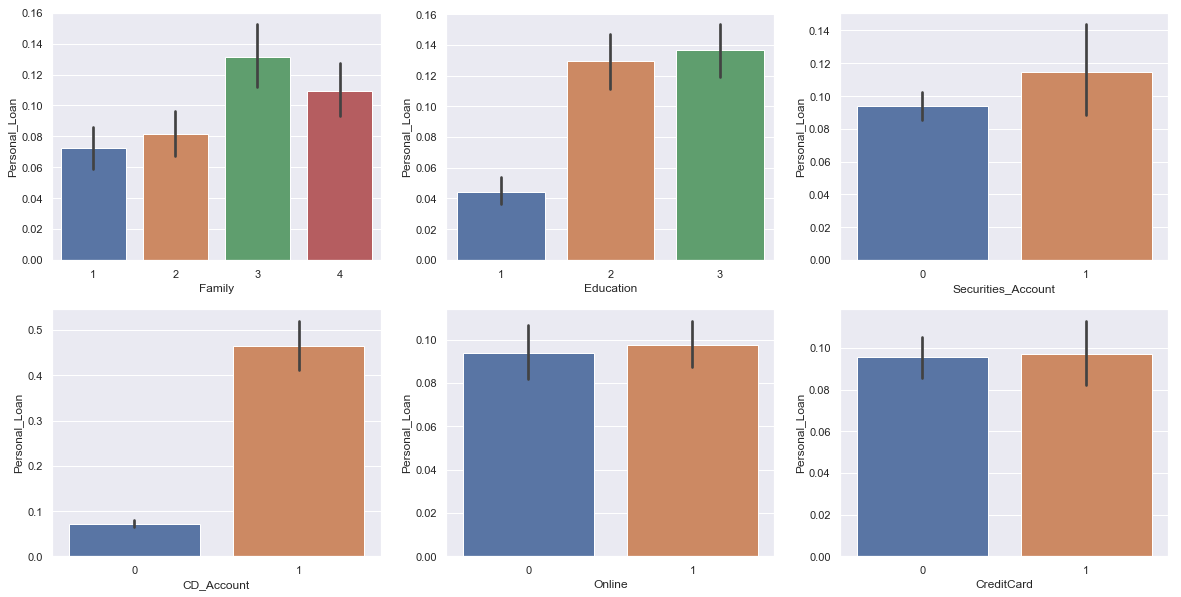

In [20]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_df):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal_Loan',data=df)

1.可以看出家庭人口>=3的贷款的人数较多
2.有证券和存款账户的人更有可能贷款
3.使用网银和有信用卡的人对是否贷款影响不大

由上每个变量与目标变量之间的关系，可以看出连续变量中收入，每月信用卡平均消费，房屋抵押金额与贷款的关系较大，因此单独分析两两的关系

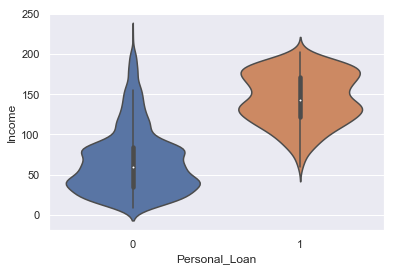

In [27]:
sns.violinplot(x='Personal_Loan',y='Income',data=df)

收入高的人更愿意贷款，找出贷款随着收入变化情况

In [28]:
df['incom_bins']=pd.qcut(df.Income,20)

In [29]:
df1=df.groupby(by='incom_bins')['Personal_Loan'].agg({'loan_rate':np.mean})

In [30]:
df1

,loan_rate
incom_bins,
"(7.999, 18.0]",0.000000
"(18.0, 22.0]",0.000000
"(22.0, 29.0]",0.000000
"(29.0, 33.0]",0.000000
"(33.0, 39.0]",0.000000
"(39.0, 42.0]",0.000000
"(42.0, 45.0]",0.000000
"(45.0, 52.0]",0.000000
"(52.0, 59.0]",0.000000


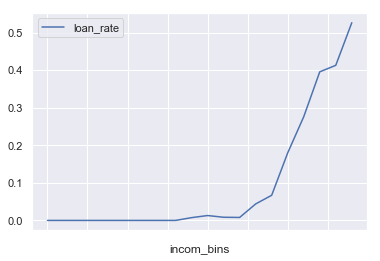

In [31]:
df1.plot()

可以看出，当收入大于82000美元时，贷款意愿开始大幅增长，当大于88000美元时，贷款意愿成倍增长，收入超过170000美元时，贷款意愿达到一半

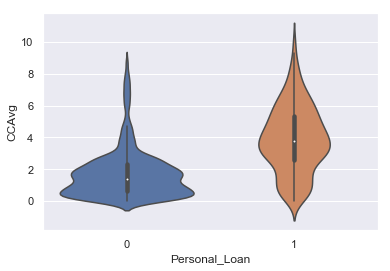

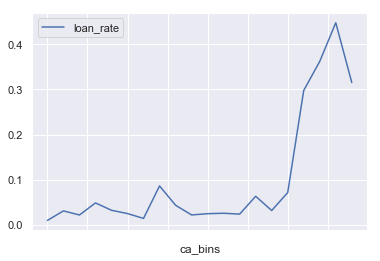

In [32]:
sns.violinplot(x='Personal_Loan',y='CCAvg',data=df)
df['ca_bins']=pd.qcut(df.CCAvg,20)
df2=df.groupby(by='ca_bins')['Personal_Loan'].agg({'loan_rate':np.mean})
df2.plot()

In [33]:
df2

,loan_rate
ca_bins,
"(-0.001, 0.1]",0.010381
"(0.1, 0.3]",0.031461
"(0.3, 0.4]",0.022346
"(0.4, 0.5]",0.049080
"(0.5, 0.7]",0.032787
"(0.7, 0.8]",0.025510
"(0.8, 1.0]",0.014837
"(1.0, 1.2]",0.086667
"(1.2, 1.4]",0.043956


可以看出信用卡消费金额越高，贷款意愿越强，当消费金额达到2800美元后，贷款意愿大幅增加，超过之前的3倍多，但当消费金额大于6000时，贷款数量表少，可能的原因是风险增大，贷款较难申请

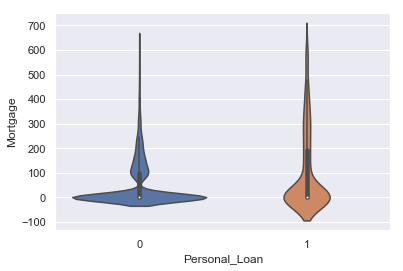

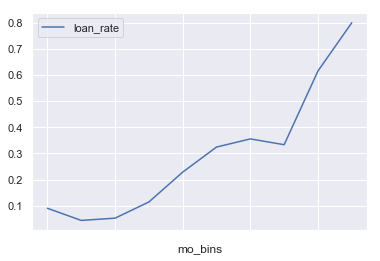

In [34]:
sns.violinplot(x='Personal_Loan',y='Mortgage',data=df)
df['mo_bins']=pd.cut(df.Mortgage,10)
df3=df.groupby(by='mo_bins')['Personal_Loan'].agg({'loan_rate':np.mean})
df3.plot()

In [35]:
df3

,loan_rate
mo_bins,
"(-0.635, 63.5]",0.090121
"(63.5, 127.0]",0.043630
"(127.0, 190.5]",0.052257
"(190.5, 254.0]",0.114173
"(254.0, 317.5]",0.228346
"(317.5, 381.0]",0.324324
"(381.0, 444.5]",0.355556
"(444.5, 508.0]",0.333333
"(508.0, 571.5]",0.615385


当抵押贷款大于254000美元时，贷款意愿时之前的2倍，抵押金额达到508000美元时，贷款意愿达6成

In [39]:
from warnings import simplefilter      #忽略报错
simplefilter(action='ignore', category=FutureWarning)

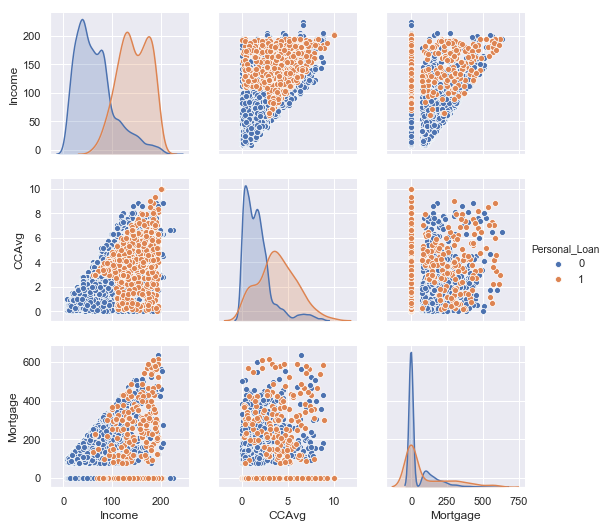

In [40]:
#三个连续型变量是否贷款之间的关系
sns.pairplot(df.loc[:,['Personal_Loan','Income','CCAvg','Mortgage']],
             hue='Personal_Loan',
             diag_kind='kde',
             vars=['Income','CCAvg','Mortgage'])

收入较高，信用卡消费较高的用户倾向于申请贷款
信用卡消费与抵押贷款较多的用户，与贷款意向关系不明显

In [52]:
#三个离散型变量与是否贷款之间的关系
df.groupby(by=['Family','Education','CD_Account'])['Personal_Loan'].agg({'count':'count','sum':'sum','mean':'mean'}).sort_values('mean',ascending=False)

count  sum      mean
Family Education CD_Account                      
4      2         1              22   15  0.681818
2      2         1              16   10  0.625000
3      2         1              24   15  0.625000
       3         1              28   17  0.607143
1      2         1              26   15  0.576923
       3         1              28   16  0.571429
4      3         1              18    9  0.500000
2      3         1              22   11  0.500000
4      1         1              30   14  0.466667
3      1         1              30   13  0.433333
1      1         1              29    5  0.172414
2      2         0             249   40  0.160643
3      3         0             250   32  0.128000
2      3         0             352   41  0.116477
4      3         0             363   37  0.101928
1      3         0             440   42  0.095455
3      1         0             319   27  0.084639
1      2         0             300   25  0.083333
4      2         0             407   33  0.081081
3      2         0             359   29  0.080780
4      1         0             382   26  0.068063
2      1         0             628    4  0.006369
1      1         0             649    4  0.006163
2      1         1              29    0  0.000000

家庭人口大于3，同时教育水平较高，有信用卡的人，贷款意向更高